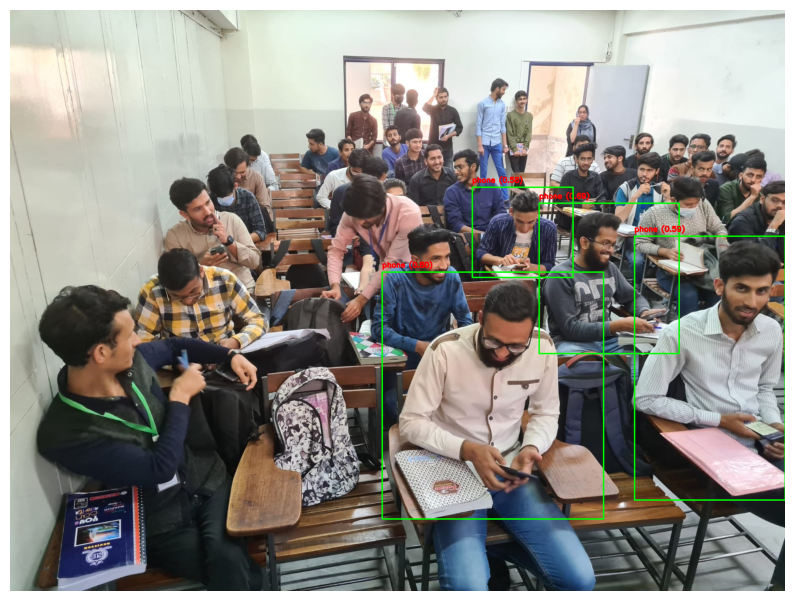

In [3]:
# Install required library (uncomment the line below if not already installed)
# !pip install inference-sdk

# Import necessary libraries
from inference_sdk import InferenceHTTPClient
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Set up the Inference Client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="D6NnigvMvhlT8B4yVYU4"
)

# Define model ID and image file path
model_id = "offline-exam-monitoring-3-rub5m-y5zbj/1"
image_path = "image.jpg"

# Run inference
result = CLIENT.infer(image_path, model_id=model_id)

# Parse response for visualization
detections = result['predictions']

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualize the detections
for detection in detections:
    x, y, width, height = detection['x'], detection['y'], detection['width'], detection['height']
    x1 = int(x - width / 2)
    y1 = int(y - height / 2)
    x2 = int(x + width / 2)
    y2 = int(y + height / 2)

    # Draw bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Add label
    label = f"{detection['class']} ({detection['confidence']:.2f})"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()
